In [1]:
import pandas as pd
import numpy as np

#### reading data
#### Data Credits URL : https://raw.githubusercontent.com/shubh24/indian-premier-league/master/matches.csv 

In [2]:
matches = pd.read_csv("https://raw.githubusercontent.com/shubh24/indian-premier-league/master/matches.csv")

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [4]:
all_seasons = list(matches['season'].unique())
all_seasons

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

#### things to explore
1. winning the toss, bat or field
2. have won the toss, but lossed the matches
3. win by less runs
4. win by few wickets in hand
5. no of tie's
6. more time mom's
7. venue hosting the large no. of matches

#### winning the toss, bat or field ?

In [5]:
toss_decision_seasons = matches.groupby(['season', 'toss_decision'], as_index=False)['id'].count()
toss_decision_seasons = toss_decision_seasons.rename(columns={'id': '# times'})
toss_decision_seasons.pivot(index='season', columns='toss_decision', values='# times')

toss_decision,bat,field
season,,
2008,26,32
2009,35,22
2010,39,21
2011,25,48
2012,37,37
2013,45,31
2014,19,41
2015,25,34
2016,11,49


#### years 2011, 2014, 2016 team has more often chose to field that bat

#### have won the toss, but lossed the matches

In [6]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [7]:
toss_decision_losing = matches[matches['toss_winner'] != matches['winner']]
toss_decision_losing = toss_decision_losing.groupby(['season', 'toss_winner'], as_index=False)['id'].count()
toss_decision_losing = toss_decision_losing.rename(columns={'id': '# times'})
toss_decision_losing = toss_decision_losing.pivot(index='toss_winner', columns='season', values='# times')
toss_decision_losing.fillna(0).astype(int).style.apply(highlight_max)

season,2008,2009,2010,2011,2012,2013,2014,2015,2016
toss_winner,,,,,,,,,
Chennai Super Kings,2,3,4,2,3,1,4,5,0
Deccan Chargers,7,3,4,3,7,0,0,0,0
Delhi Daredevils,4,3,3,6,5,5,4,3,3
Gujarat Lions,0,0,0,0,0,0,0,0,2
Kings XI Punjab,4,2,5,6,4,3,2,6,6
Kochi Tuskers Kerala,0,0,0,4,0,0,0,0,0
Kolkata Knight Riders,3,5,3,2,2,8,3,3,2
Mumbai Indians,4,3,3,3,5,4,3,4,4
Pune Warriors,0,0,0,5,5,7,0,0,0


#### win by less runs

In [8]:
wins_less_margin = matches[(matches['win_by_runs'] < 10) & (matches['win_by_wickets'] == 0)]
wins_less_margin = wins_less_margin[wins_less_margin['win_by_runs'] > 0]
wins_less_margin = wins_less_margin.groupby(['season', 'winner'], as_index=False)['id'].count()
wins_less_margin = wins_less_margin.rename(columns={'id': '# times'})
wins_less_margin = wins_less_margin.pivot(index='winner', columns='season', values='# times').fillna(0).astype(int)
wins_less_margin.style.apply(highlight_max)

season,2008,2009,2010,2011,2012,2013,2014,2015,2016
winner,,,,,,,,,
Chennai Super Kings,2,0,0,1,0,0,1,2,0
Deccan Chargers,0,1,1,0,1,0,0,0,0
Delhi Daredevils,0,1,0,0,1,0,0,1,0
Gujarat Lions,0,0,0,0,0,0,0,0,1
Kings XI Punjab,3,2,0,0,2,2,0,0,1
Kochi Tuskers Kerala,0,0,0,1,0,0,0,0,0
Kolkata Knight Riders,1,0,0,1,1,0,1,0,1
Mumbai Indians,0,1,1,1,1,2,0,2,0
Pune Warriors,0,0,0,0,0,1,0,0,0


#### win by few wickets in hand

In [9]:
wins_less_wickets = matches[(matches['win_by_wickets'] > 0) & (matches['win_by_wickets'] < 4)]
wins_less_wickets = wins_less_wickets.groupby(['season', 'winner'], as_index=False)['id'].count()
wins_less_wickets = wins_less_wickets.rename(columns={'id': '# times'})
wins_less_wickets = wins_less_wickets.pivot(index='winner', columns='season', values='# times').fillna(0).astype(int)
wins_less_wickets.style.apply(highlight_max)

season,2008,2009,2011,2012,2013,2014,2015,2016
winner,,,,,,,,
Chennai Super Kings,0,0,0,0,0,0,1,0
Delhi Daredevils,0,0,1,0,0,0,0,0
Gujarat Lions,0,0,0,0,0,0,0,2
Kings XI Punjab,0,1,0,0,0,0,0,0
Kolkata Knight Riders,1,0,0,0,0,1,1,1
Mumbai Indians,0,0,0,1,0,0,0,0
Rajasthan Royals,3,1,0,0,0,0,1,0
Royal Challengers Bangalore,0,1,1,0,0,0,1,0
Sunrisers Hyderabad,0,0,0,0,1,0,0,0


#### no of tie's

In [10]:
matches[matches['result'] == 'tie'][['season', 'team1', 'team2']]

,season,team1,team2
66,2009,Rajasthan Royals,Kolkata Knight Riders
130,2010,Kings XI Punjab,Chennai Super Kings
328,2013,Royal Challengers Bangalore,Sunrisers Hyderabad
341,2013,Delhi Daredevils,Royal Challengers Bangalore
416,2014,Rajasthan Royals,Kolkata Knight Riders
476,2015,Rajasthan Royals,Kings XI Punjab


#### there were 2 ties in 2013 edition, on both instances one of the same team was playing

#### more time mom's

In [11]:
overall_mom_list = matches['player_of_match'].value_counts()
overall_mom_list = overall_mom_list[overall_mom_list > 9]
overall_mom_list.index

mom_list = matches[matches['player_of_match'].isin(overall_mom_list.index)]
mom_list = mom_list.groupby(['season', 'player_of_match'], as_index=False)['id'].count()
most_mom_players = mom_list.rename(columns={'id': '# times'})
most_mom_players = most_mom_players.pivot(index='player_of_match', columns='season', values='# times').fillna(0).astype(int)
most_mom_players.style.apply(highlight_max)

season,2008,2009,2010,2011,2012,2013,2014,2015,2016
player_of_match,,,,,,,,,
AB de Villiers,0,2,0,1,3,1,2,2,4
AM Rahane,0,0,0,0,2,3,2,3,2
CH Gayle,0,1,0,6,5,3,0,2,0
DA Warner,0,0,1,1,1,2,2,4,3
DR Smith,0,1,0,0,2,2,3,0,2
G Gambhir,0,1,2,1,3,2,2,0,1
JH Kallis,0,2,3,1,1,2,1,0,0
MEK Hussey,1,0,0,3,1,5,2,0,0
MS Dhoni,2,1,2,1,1,3,1,0,1


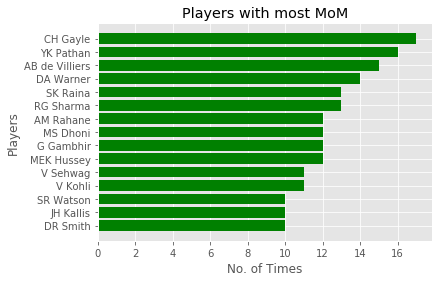

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
overall_mom_list = overall_mom_list.sort_values()
player_names = overall_mom_list.index
x_pos = [i for i, _ in enumerate(player_names)]
n_times = overall_mom_list.values
plt.barh(x_pos, n_times, color='green')
plt.ylabel("Players")
plt.xlabel("No. of Times")
plt.title("Players with most MoM")
plt.yticks(x_pos, player_names)
plt.show()

#### venue hosting the large no. of matches

In [13]:
freq_venues = matches.groupby(['season', 'venue'], as_index=False)['id'].count()
freq_venues = freq_venues.rename(columns={'id': '# times'})
freq_venues.pivot(index='venue', columns='season', values='# times').fillna(0).astype(int).style.apply(highlight_max)

season,2008,2009,2010,2011,2012,2013,2014,2015,2016
venue,,,,,,,,,
Barabati Stadium,0,0,2,0,2,0,3,0,0
Brabourne Stadium,0,0,7,0,0,0,1,3,0
Buffalo Park,0,3,0,0,0,0,0,0,0
De Beers Diamond Oval,0,3,0,0,0,0,0,0,0
Dr DY Patil Sports Academy,4,0,6,7,0,0,0,0,0
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,0,0,0,0,2,0,0,3,6
Dubai International Cricket Stadium,0,0,0,0,0,0,7,0,0
Eden Gardens,7,0,7,7,7,8,4,7,7
Feroz Shah Kotla,6,0,7,7,8,8,5,5,7


#### heatgrid chart to show more variations

In [14]:
overall_freq_venues = matches.groupby(['venue'], as_index=False)['id'].count()
overall_freq_venues = overall_freq_venues.rename(columns={'id': '# times'})
overall_freq_venues = overall_freq_venues[overall_freq_venues['# times'] > 9]
overall_freq_venues.sort_values('# times', ascending=False)

,venue,# times
14,M Chinnaswamy Stadium,58
7,Eden Gardens,54
8,Feroz Shah Kotla,53
34,Wankhede Stadium,49
15,"MA Chidambaram Stadium, Chepauk",48
23,"Rajiv Gandhi International Stadium, Uppal",41
22,"Punjab Cricket Association Stadium, Mohali",35
26,Sawai Mansingh Stadium,33
4,Dr DY Patil Sports Academy,17
31,Subrata Roy Sahara Stadium,17


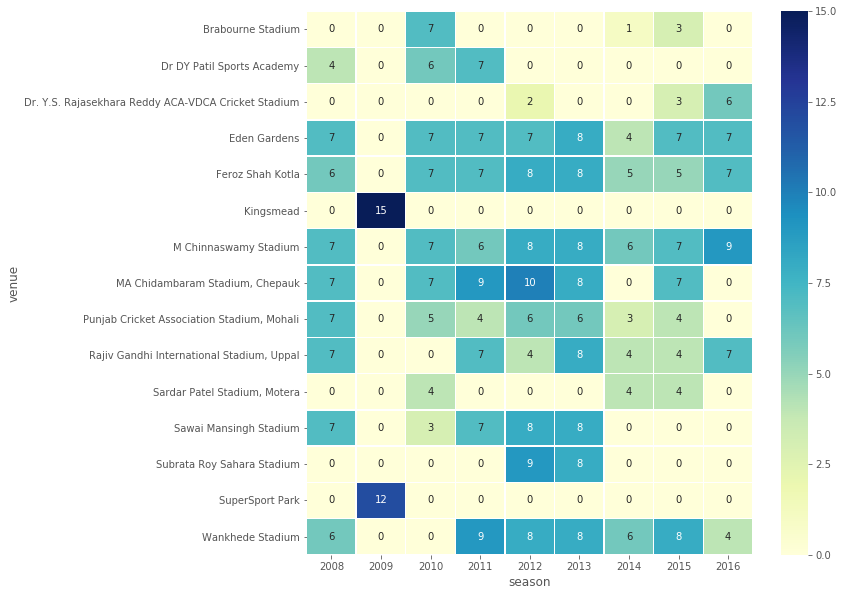

In [15]:
top_venues = list(overall_freq_venues['venue'])
most_freq_venues = freq_venues[freq_venues['venue'].isin(top_venues)]
most_freq_venues = most_freq_venues.pivot(index='venue', columns='season', values='# times').fillna(0).astype(int)

import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(most_freq_venues, cmap="YlGnBu", linewidths=0.5, annot=True)